C:\Users\aethe\AppData\Local\Temp\ipykernel_17612\1220655645.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cens=pd.read_csv("conjunto_de_datos_iter_00CSV20.csv")
c:\Users\aethe\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


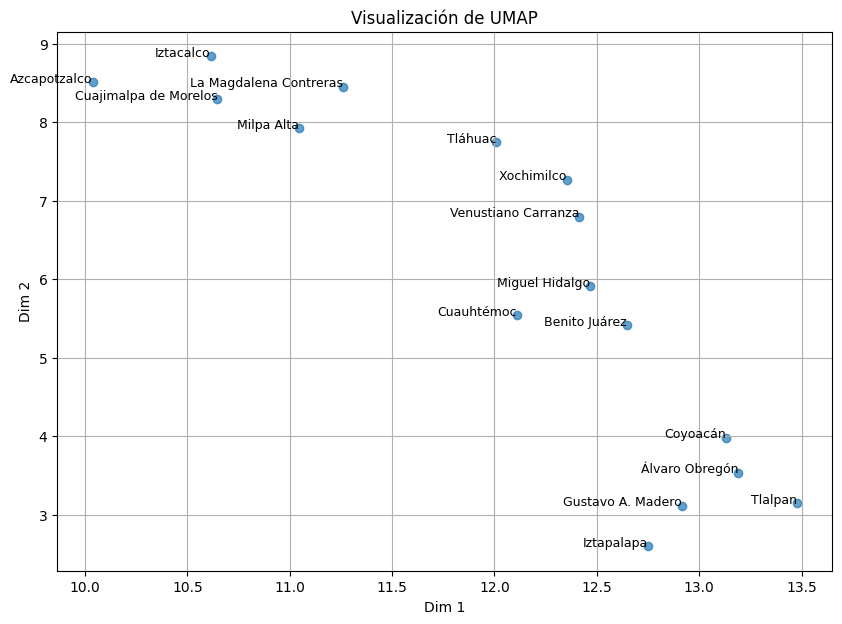

In [6]:
import pandas as pd
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Cargar los datos desde un archivo Excel
cens=pd.read_csv("conjunto_de_datos_iter_00CSV20.csv")
cens = cens[(cens['LOC'] == 0) & (cens['MUN'] >= 1) & (cens['ENTIDAD'] >= 1)]
vari=['MUN', 'NOM_ENT',  'NOM_MUN',"P15PRI_IN", "P15SEC_IN", "POCUPADA", "PSINDER","P15YM_AN", "GRAPROES", "VPH_3YMASC", "VPH_DSADMA", "VPH_AUTOM", "VPH_MOTO"]
df=cens[vari]
df=df[df["NOM_ENT"]=="Ciudad de México"]
df=df.reset_index()



# Selecciona las columnas numéricas para aplicar UMAP (excluyendo 'Entidad')
X = df.drop(columns=['NOM_ENT', "MUN", "NOM_MUN"])

# Asegúrate de que no hay valores categóricos ni missing values
X = X.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar UMAP para reducir a 2 dimensiones
umap_model = umap.UMAP(n_neighbors=4, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de UMAP
df_umap = pd.DataFrame(X_umap, columns=['Dim 1', 'Dim 2'])
df_umap['Entidad'] = df['NOM_MUN']

# Graficar los resultados de UMAP
plt.figure(figsize=(10, 7))
plt.scatter(df_umap['Dim 1'], df_umap['Dim 2'], alpha=0.7)
for i, entity in enumerate(df_umap['Entidad']):
    plt.text(df_umap['Dim 1'][i], df_umap['Dim 2'][i], entity, fontsize=9, ha='right')
plt.title('Visualización de UMAP')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()


c:\Users\aethe\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\aethe\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


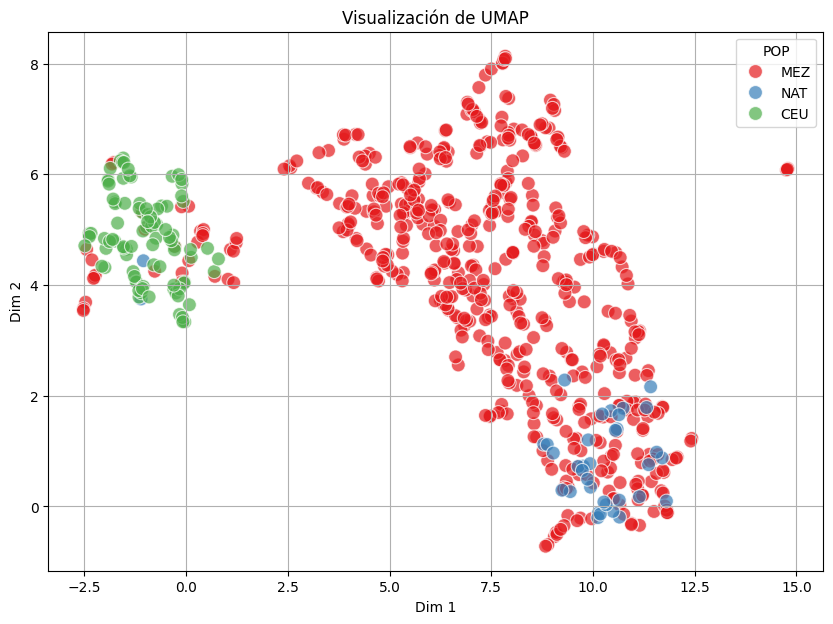

In [2]:
import seaborn as sns
import pandas as pd
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

aims=pd.read_excel("Ancestria.xlsx")

aims=aims.dropna()
# Selecciona las columnas numéricas para aplicar t-SNE (excluyendo 'Entidad')
X = aims.drop(columns=["FOLIO", "POP"])


# Asegúrate de que no hay valores categóricos ni missing values
X = X.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar UMAP para reducir a 2 dimensiones
umap_model = umap.UMAP(n_neighbors=3, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de UMAP
df_umap = pd.DataFrame(X_umap, columns=['Dim 1', 'Dim 2'])
df_umap['POP'] = aims['POP']

# Graficar los resultados de UMAP

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim 1', y='Dim 2', hue='POP', data=df_umap, palette='Set1', alpha=0.7, s=100)
plt.title('Visualización de UMAP')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()